### Support vector machine
* hay veces que la representacion graficas de los puntos (por ejemplo centrifuga), para encontrar cluster, es complicada y no es facil de resolver con los modelos antes vistos (kmeans, arboles,..)
* cuando tenemos por ejemplo muchas dimensiones (features)
* aqui utilizan matematicas mas avanzadas; es algoritmo de aprendizaje supervisado tanto para clasificacion como regresion
* en una clasificacion , donde tengamos dos ejes x e y, dos clases puntos (rojos y azules) el algoritmo buscara el hiperplano separador (siempre que exista ¡¡) entre los puntos que maximize la distancia entre ellos y cada grupo (recordar imagen del curso)

### el problema del clasficador no optimo de vector machine
* a veces pasas que las clases no son separables por un hiperplano (ejemplo hay puntos en ambas partes del corredor (recordar rectas separadas) de ambas clases)
* tambien podemos resolver con un plano  que no sea lineal para la separacion, utilizando diferentes kernels (polinomial, radial,red neuronal)
* la eleccion del kernel, el numero de vectores que tendran parte en el sopote,tendra un rol importante (que la separacion de los grupos sea claro con el menor numeros de vectores)

https://www.cienciadedatos.net/documentos/34_maquinas_de_vector_soporte_support_vector_machines

### Linear support vector clasifier

In [1]:
# este es el mas sencillo (intenta encajar los puntos que les demos intentando categorizarlos y separarlos con un hiperplano)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

In [2]:
# vamos a ver un pequeño ejemplo para ver como funciona en 2D
X = [1,5,1.5,8,1,9]
Y = [2,8,1.8,8,0.6,11]

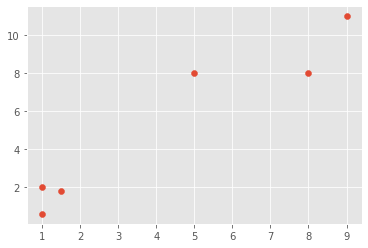

In [3]:
plt.scatter(X,Y)

In [4]:
data = np.array(list(zip(X,Y)))
data

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

In [5]:
# vamos a crear los targets (recordar que es un modelo supervisado)
target = [0,1,0,1,0,1]

In [6]:
# creamos el modelo: usamos kernel linea ya que queremos un hiperplano en 2d, o sea una recta; c= este es como de mal queremos que clasifique (ver mas info sobre este punto,donde todavia no esta muy claro , segun el profe :))
classifier = svm.SVC(kernel="linear",C=1.0)
classifier.fit(data,target)

SVC(kernel='linear')

In [7]:
data.shape

(6, 2)

In [8]:
# hacemos una prediccion de un punto random (hay que hacer un reshape porque tiene dos dimensiones ver shape)
p = np.array([0.57,0.67]).reshape(1,2)
print(p)
classifier.predict(p)

[[0.57 0.67]]


array([0])

* Modelo w0.x + w1.y + e = 0 (cuando despejamos queda la ecuacion de abajo)
* Ecuacion del hiperplano en 2D: y = a * x + b

In [9]:
# vamos hacer la representacion grafica, primero sacamos los pesos para las categorias 0 y 1
w = classifier.coef_[0]
w

array([0.1380943 , 0.24462418])

In [10]:
# calculamos la pendiente de la recta
a = -w[0]/w[1]
a

-0.564516129032258

In [11]:
# ahora la ordenada al origen ( intercep)
b = - classifier.intercept_[0]/w[1]
b

6.734677437813051

In [12]:
# creamos la recta
xx = np.linspace(0,10)
yy = a * xx + b

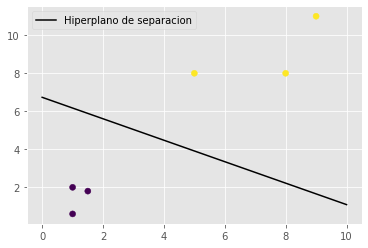

In [13]:
plt.plot(xx,yy,"k-",label="Hiperplano de separacion")
plt.scatter(X,Y,c=target)
plt.legend()

In [14]:
### Support vector machine
import seaborn as sns
from scipy import stats
sns.set()

In [15]:
### el problema de la separacion

In [16]:
from sklearn.datasets.samples_generator import make_blobs

In [17]:
# vamos a crear una distribucion de puntos con dos cluster
X, Y = make_blobs(n_samples=50,centers=2,cluster_std=0.6,random_state=0)

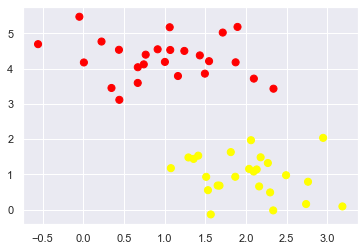

In [18]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")

(-1.0, 3.5)

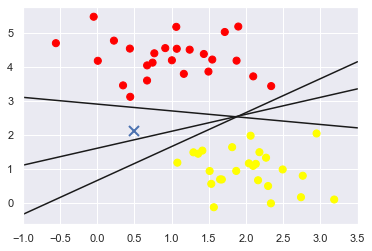

In [19]:
# vamos a generar un punto dificil de clasificar 
xx = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plt.plot([0.5],[2.1],'x',color="b",markeredgewidth=2,markersize=10)

# en principio parece que pertence a los rojos, pero segun que recta tracemos puede que no
for a,b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    yy = a * xx + b
    plt.plot(xx,yy,"-k")
plt.xlim(-1,3.5)

### Los soportes del SVM

(-1.0, 3.5)

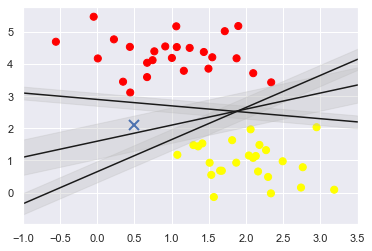

In [20]:
# porque entonces no pintamos un pasillo bien ancho hasta encontrar el primer punto de cada grupo ( el modelo svm tiende a la maximizacion del margen; los support vectors serian los limites , cuando encuentrarn el primer punto de cada grupo. a partir de esos puntos el algoritmo clasifica)

 
xx = np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
plt.plot([0.5],[2.1],'x',color="b",markeredgewidth=2,markersize=10)


for a,b,d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    yy = a * xx + b
    plt.plot(xx,yy,"-k")
    plt.fill_between(xx, yy-d, yy+d, edgecolor="none",color="#BBBBBB",alpha=0.3)
plt.xlim(-1,3.5)

### Indicar fronteras no lineales
* cuando el modelo da todo de si es cuando la separacion no es lineal; pensemos en distribuciones circulares, como hemos vistos en otros graficos; una recta no seria una solucion buena; una idea es aumentar las dimensiones (pensemos en 3D) y hay podemos establecer la division (por ejemplo arriba y abajo)
* ver notebooks profesor para ver graficos
* aumentar las dimensiones, cuando son muchas, computacionalmente es muy caro; pero hay un truco a traves de los kernels, con transformaciones no lineales, se puede cambiar el tipo para obtener buenos reslultados sin tener que recurrir a ampliar dimensiones

In [ ]:
### Ajustar los parametros SVM
* muchas veces las distribuciones no son tan claras de ver y generan dudas de que tipo de kernel o parametros utilizar

In [22]:
X, Y = make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=1.2)

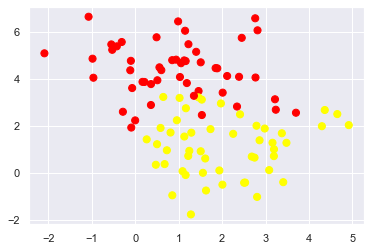

In [23]:
# aqui vemos que una separacion lineal es muy dificil, incluso con circulo o parabolas
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")

In [ ]:
* para esto, SVM, tiene una funcion que relaja los margenes, a expensas que algun punto quede mal clasificado, con parametro C= (penalty parametro); cuando mayor sea los margenes seran mas inflexibles, si el punto no esta dentro no cuenta; cuanto menor sea son mas flexibles pudiendo quedar ese punto dudoso dentro 
* que valores escoger ? pues segun el caso, pero por ejemplo con validacion cruzada podemos hacer pruebas y ver 

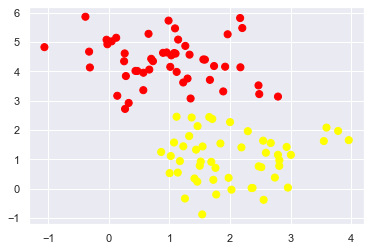

In [24]:
# hacemos lo mismo, con menos desviacion estandar, para ver como influye la C
X, Y = make_blobs(n_samples=100,centers=2,random_state=0,cluster_std=0.8)
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")

In [26]:
# 
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
        
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

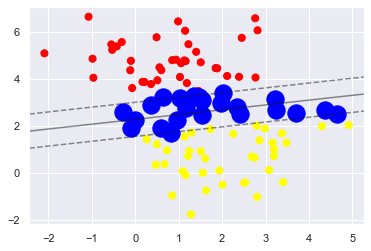

In [28]:
from sklearn.svm import SVC
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=1.2)

plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=10)
model.fit(X,Y)
plt_svc(model)




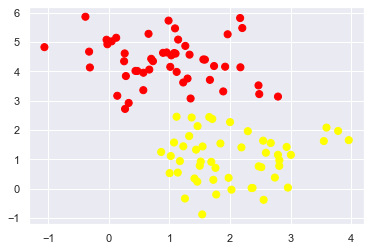

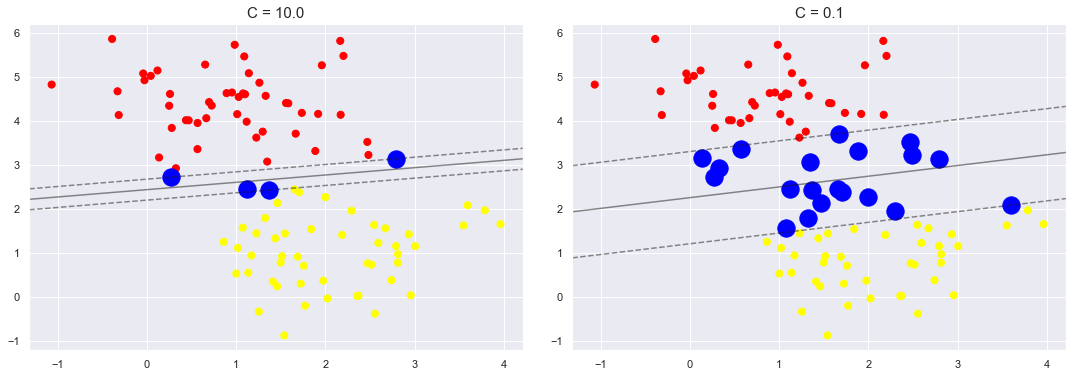

In [29]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")



fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace=0.1)

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)